In [ ]:
# Installation of additional libraries
!pip install mlxtend
%pip install mlxtend --upgrade
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from mlxtend.frequent_patterns import fpgrowth

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


This algorithm used for Recommendation in retail scenario,
if somone buy Pizza we can recommend soda 

In [ ]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/CA2 MLB 21 12 2022/Bakery.csv')

In [ ]:
# looking top 10 rows
df.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [ ]:
# looking the bigger picture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

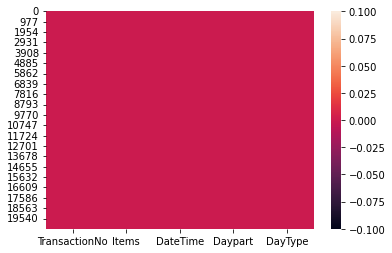

In [ ]:
sns.heatmap(df.isnull())
plt.show()

I have no missing values 

###Data Preparation

In [ ]:
df["Year"]=pd.to_datetime(df["DateTime"]).dt.year
df["Month"]=pd.to_datetime(df["DateTime"]).dt.month
df["Week Day"]=pd.to_datetime(df["DateTime"]).dt.weekday
df["Hour"]=pd.to_datetime(df["DateTime"]).dt.hour

In [ ]:
# Display first 5 records.
df.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType,Year,Month,Week Day,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,10,6,9
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,6,10
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,10,6,10
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,10,6,10


###**Apriori Algorithm**

In [ ]:
dataapriori=df.groupby(["TransactionNo","Items"])["Items"].count().reset_index(name="Quantity")
dataapriori

,TransactionNo,Items,Quantity
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [ ]:
df['Items'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Items, Length: 94, dtype: int64

I want to see how many records for each item. It is evident that Coffee has the highest, followed by Bread and then Tea.

In [ ]:
### Convert to Pivot Table
datapivot=dataapriori.pivot_table(index="TransactionNo",columns="Items",values="Quantity",aggfunc="sum").fillna(0)
datapivot

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In this basket of transactions, i have the Transaction Number as key and we also have the name of the product. The number 0 means that the product was not present in this transaction, if we have a positive number that means the product was a part of this transaction. Now i create a basket of transactions.

In [ ]:
### You need to convert the data to 0 and 1 or True and False. Because the apriori algorithm works with them.
def table(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

datapivottable=datapivot.applymap(table)
datapivottable

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, i convert all the numbers that are less than 0 to 0 and all the numbers which are greater than 1 to 1. I need this data to become only 0 and 1, that is what the algorithm expects as input.

Training the Model

In [ ]:
#Generating frequent itemsets

aprioridata=apriori(datapivottable,min_support=0.01,use_colnames=True)


/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
#Generating rules
rules=association_rules(aprioridata, metric = "lift", min_threshold = 1)
rules.sort_values("confidence",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


Here I can see the "antecedents" and "consequents" with a particular number of support, confidence and lift. So Toast implies Coffee the support is 0.23 the confidence is 0.70 and lift is 1.47. So i can   use these roles to make a recommendation.

Making recommendation,

In [ ]:
datapivottable['Cookies'].sum()

515

If i take Cookies and how many times is opening i can see is 515 times  

In [ ]:
datapivottable['Sandwich'].sum()

680

Here it is clear that the people who are buying Cookies 515 times out of those are 680 times the item being bought. We can see the rules are giving us different routes. We can see good support lift and confidence number for these two items which means that every time this product is bought we can recommend the item in addition to coffee.


###**FP Growth Algorithm**

In [ ]:
#Filtering rules based on condition
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
15,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


Here i can see the "antecedents" and "consequents" with a particular number of support, confidence and lift .
So "Alfajores" implies "Coffee" the support is 0.01 the confidence is 0.54 and lift is 1.13.
So i can use these roles to make a recommendation.


I need to call TransactionEncoder and train the model
By doing that we got the results bellow,


In [ ]:
# Create an object te by calling a method TransactionEncoder()
te = TransactionEncoder()

# Call fit() method to train the model
te_array = te.fit(df).transform(df)

# Transform te_array into dataframe
df = pd.DataFrame(te_array, columns = te.columns_)

In [ ]:
df.head()

,,D,H,I,M,N,T,W,Y,a,...,k,m,n,o,p,r,s,t,u,y
0,False,False,False,False,False,True,True,False,False,True,...,False,False,True,True,False,True,True,True,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,False,True,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,False,True
4,False,True,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True


When i display fp-growth algorithm i got the results.

In [ ]:
# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp1 = apriori(datapivottable,min_support = 0.05, use_colnames = True)

frequent_itemsets_fp1

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.327205,(Bread)
1,0.103856,(Cake)
2,0.478394,(Coffee)
3,0.054411,(Cookies)
4,0.058320,(Hot chocolate)
5,0.061807,(Medialuna)
6,0.086107,(Pastry)
7,0.071844,(Sandwich)
8,0.142631,(Tea)
9,0.090016,"(Bread, Coffee)"


In [ ]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_itemsets_fp1, metric = "lift", min_threshold = 0.8)

print(rules_fp1)

  antecedents consequents  antecedent support  consequent support   support  \
0    (Coffee)      (Cake)            0.478394            0.103856  0.054728   
1      (Cake)    (Coffee)            0.103856            0.478394  0.054728   

   confidence      lift  leverage  conviction  
0    0.114399  1.101515  0.005044    1.011905  
1    0.526958  1.101515  0.005044    1.102664  


Here it is evident that the people who are buying Coffee, i can recommend Cake. i see the rules are giving us different routes i can see good support lift and confidence numbers for these two items which mean that every time this product is bought i can recommend the Cake.